<a href="https://www.kaggle.com/code/alperenkaran/eda-on-students-performances?scriptVersionId=106349420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import Markdown, display

In [2]:
def printm(x):
    display(Markdown(x))

In [3]:
data = pd.read_csv('../input/students-performance-in-exams/exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_cols = ['math score', 'reading score', 'writing score']

# Counts of categorical columns

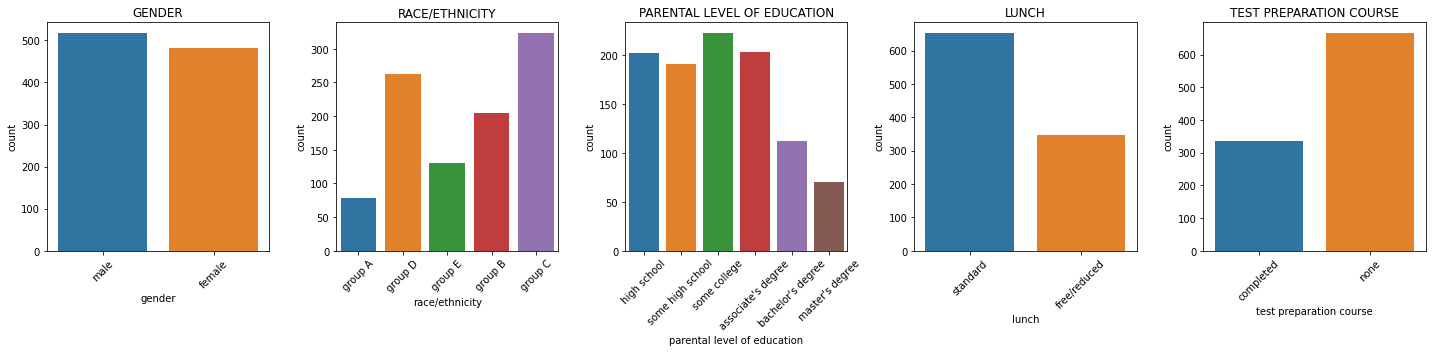

In [5]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=5)

for i,col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45) 
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

# Distribution of Numerical Columns

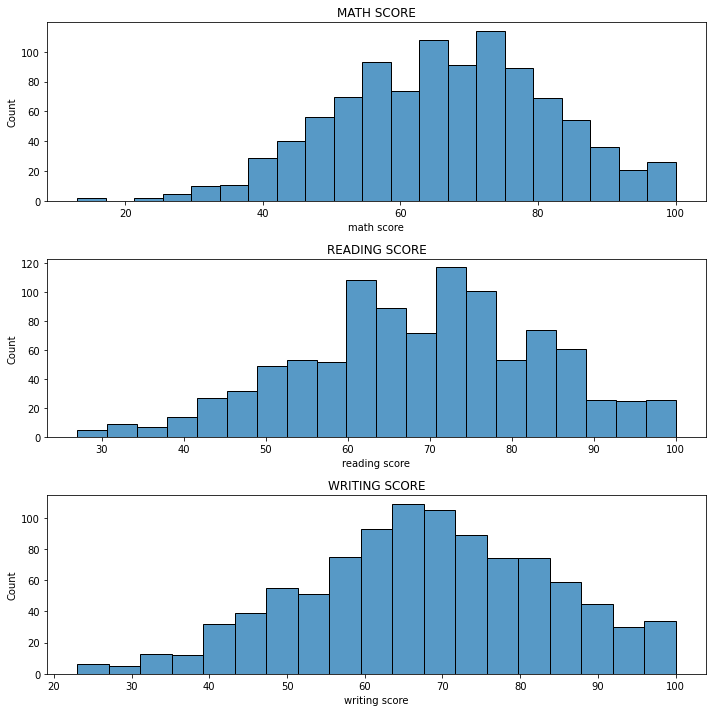

In [6]:
fix, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=1)

for i,col in enumerate(num_cols):
    sns.histplot(data=data, x=col, ax=ax[i])
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

# Correlations between numerical columns

In [7]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


# Multiple interactions between columns

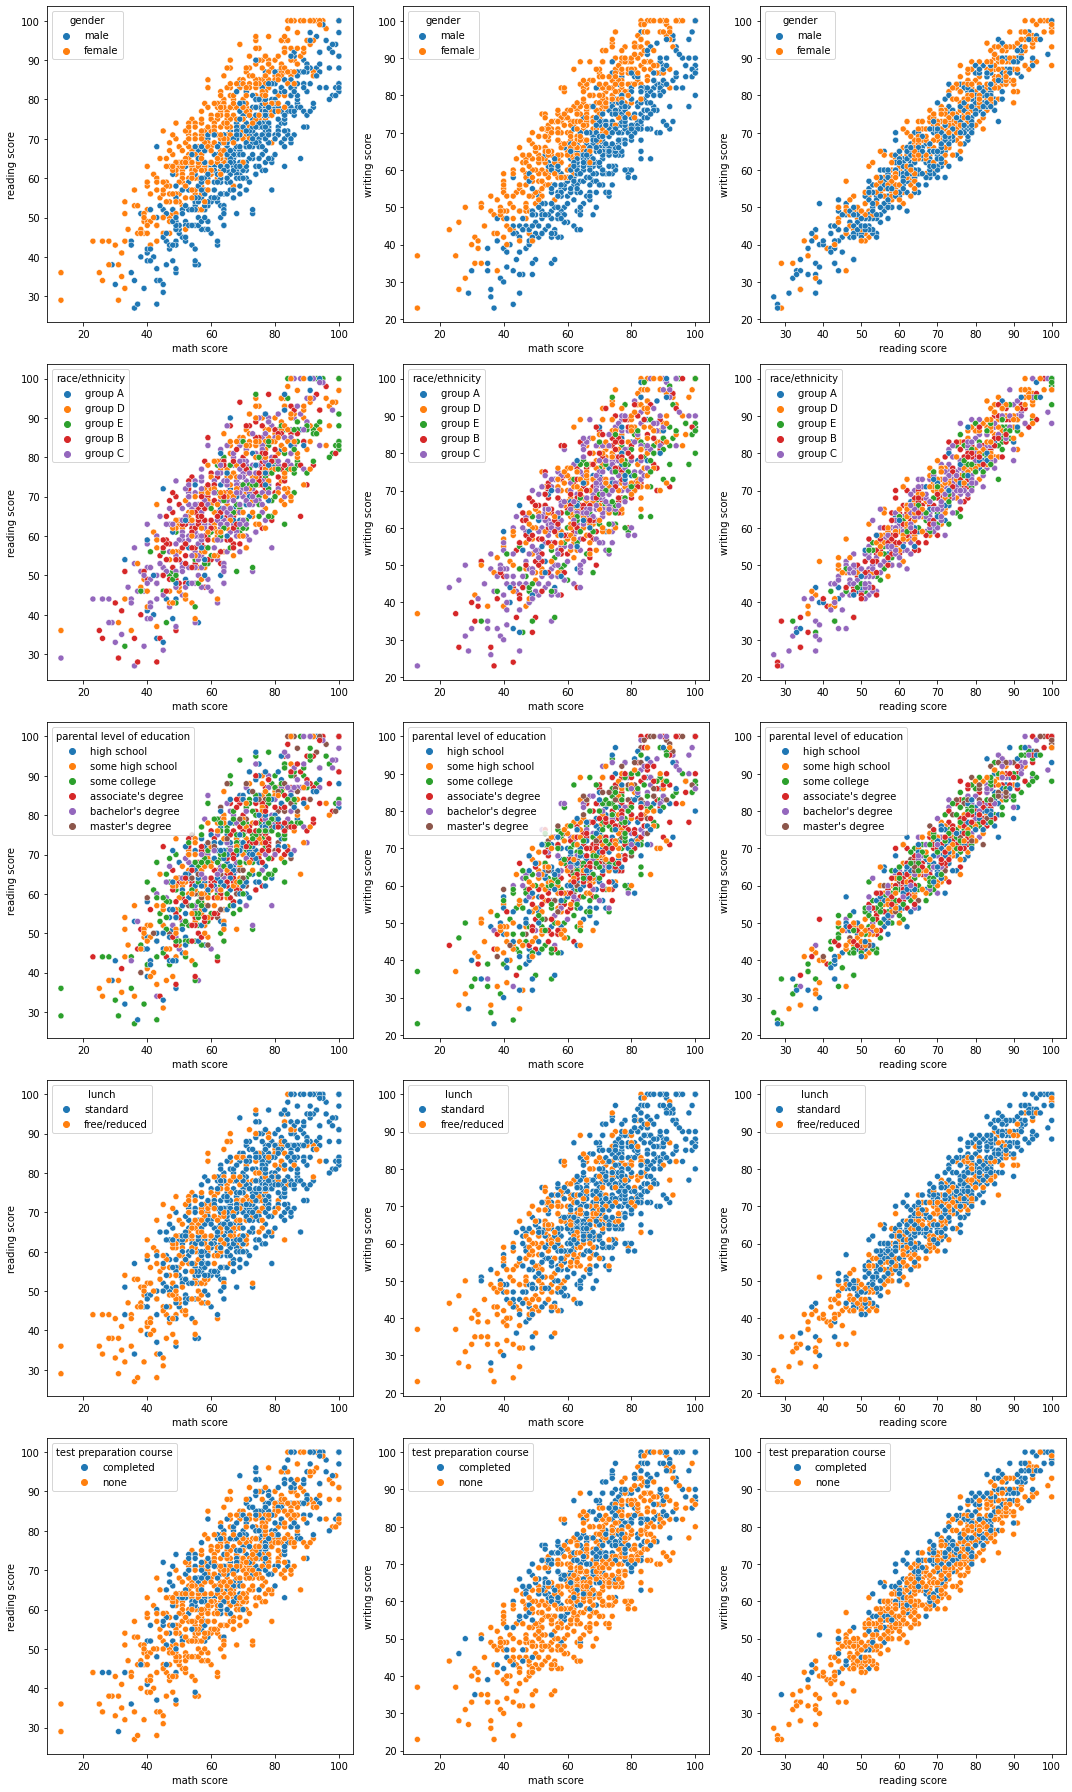

In [8]:
num_pairs = [[num_cols[0], num_cols[1]], 
         [num_cols[0], num_cols[2]], 
         [num_cols[1], num_cols[2]]]

fix, ax = plt.subplots(figsize=(15,25), nrows=5, ncols=3)

for i,p in enumerate(num_pairs):
    for j,hue in enumerate(cat_cols):
        sns.scatterplot(data=data, x=p[0], y=p[1], hue=hue, ax=ax[j,i])

plt.tight_layout()
plt.show()

# Statistical Analysis

In [9]:
def compare_groups(grouping_variable):
    printm(f'We are looking at the effect of **{grouping_variable.upper()}**.')
    print('\n\n')
    data.groupby(grouping_variable).mean().T.plot(kind='bar', figsize=(10,4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
    plt.grid()
    plt.title(grouping_variable.upper())
    plt.show()
    pairs = [pair for pair in data.groupby(grouping_variable)]
    values, groups = [pair[0] for pair in pairs], [pair[1] for pair in pairs]
    
    for course in num_cols:
        scores = [subdf[course] for subdf in groups]
        averages = [subdf[course].mean().round(2) for subdf in groups]
        printm(f'**COURSE:** {course.split()[0].upper()}')
        
        for val,avg in zip(values, averages):
            printm(f'Average for **{val}** is {avg}.')
            
        f_value, p_value = f_oneway(*scores) # if there are two groups, ANOVA is the same as t-test
        if p_value < .05:
            printm(f'There is a significant effect of _{grouping_variable}_.')
        else:
            print('There is no significant difference between groups.')
        printm('---')

## Effect of test preparation course

We are looking at the effect of **TEST PREPARATION COURSE**.

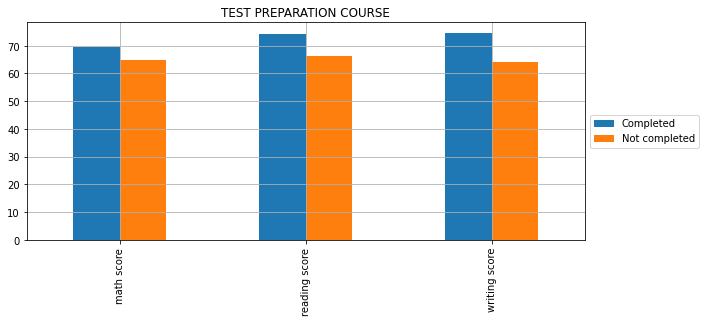

**COURSE:** MATH

Average for **Completed** is 69.69.

Average for **Not completed** is 64.74.

There is a significant effect of _test preparation course_.

---

**COURSE:** READING

Average for **Completed** is 74.09.

Average for **Not completed** is 66.44.

There is a significant effect of _test preparation course_.

---

**COURSE:** WRITING

Average for **Completed** is 74.67.

Average for **Not completed** is 64.25.

There is a significant effect of _test preparation course_.

---

In [10]:
data['test preparation course'] = data['test preparation course'].map({'completed':'Completed', 'none':'Not completed'})
compare_groups('test preparation course')

## Effect of Gender

We are looking at the effect of **GENDER**.

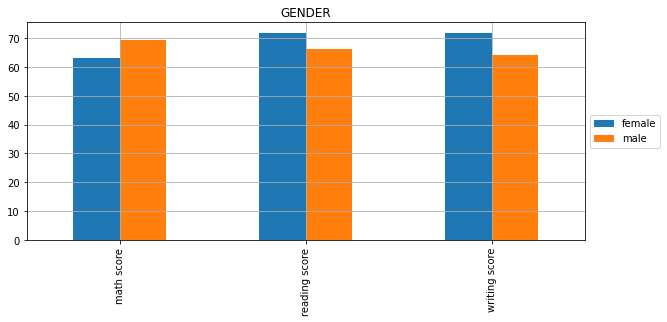

**COURSE:** MATH

Average for **female** is 63.2.

Average for **male** is 69.38.

There is a significant effect of _gender_.

---

**COURSE:** READING

Average for **female** is 71.89.

Average for **male** is 66.31.

There is a significant effect of _gender_.

---

**COURSE:** WRITING

Average for **female** is 71.71.

Average for **male** is 64.03.

There is a significant effect of _gender_.

---

In [11]:
compare_groups('gender')

## Effect of lunch

We are looking at the effect of **LUNCH**.

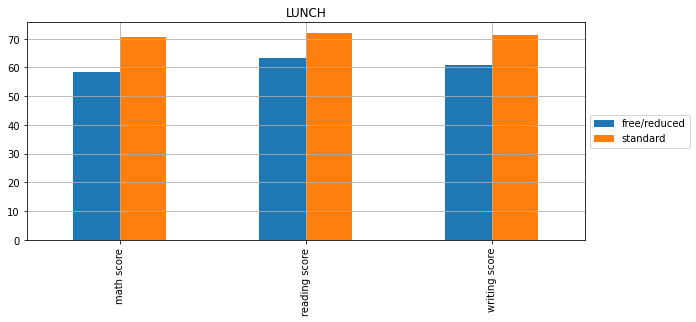

**COURSE:** MATH

Average for **free/reduced** is 58.51.

Average for **standard** is 70.61.

There is a significant effect of _lunch_.

---

**COURSE:** READING

Average for **free/reduced** is 63.19.

Average for **standard** is 72.1.

There is a significant effect of _lunch_.

---

**COURSE:** WRITING

Average for **free/reduced** is 60.93.

Average for **standard** is 71.37.

There is a significant effect of _lunch_.

---

In [12]:
compare_groups('lunch')

## Effect of parental level of education

We are looking at the effect of **PARENTAL LEVEL OF EDUCATION**.

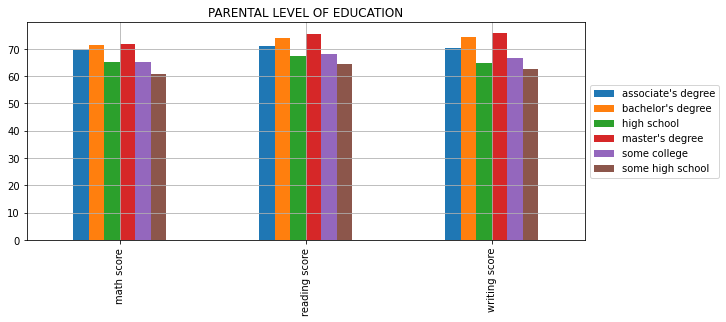

**COURSE:** MATH

Average for **associate's degree** is 69.54.

Average for **bachelor's degree** is 71.49.

Average for **high school** is 65.21.

Average for **master's degree** is 71.59.

Average for **some college** is 65.3.

Average for **some high school** is 60.7.

There is a significant effect of _parental level of education_.

---

**COURSE:** READING

Average for **associate's degree** is 70.99.

Average for **bachelor's degree** is 74.01.

Average for **high school** is 67.4.

Average for **master's degree** is 75.43.

Average for **some college** is 68.05.

Average for **some high school** is 64.41.

There is a significant effect of _parental level of education_.

---

**COURSE:** WRITING

Average for **associate's degree** is 70.11.

Average for **bachelor's degree** is 74.41.

Average for **high school** is 64.85.

Average for **master's degree** is 75.89.

Average for **some college** is 66.73.

Average for **some high school** is 62.54.

There is a significant effect of _parental level of education_.

---

In [13]:
compare_groups('parental level of education')